# Movie demos

In [1]:
import json
import logging
import os
import warnings
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib import rcParams
from numpy import degrees, array
from tqdm.notebook import tqdm

In [2]:
from pNeuma_simulator import params
from pNeuma_simulator.animations import ring
from pNeuma_simulator.gang.navigation import decay

In [3]:
warnings.filterwarnings("ignore")
rcParams["animation.embed_limit"] = 2**128
rcParams.update(
    {
        "font.family": "sans-serif",
        "font.sans-serif": "Helvetica",
        "mathtext.fontset": "stixsans",
        "mathtext.default": "regular",
        "font.size": 7,
        "axes.titlesize": 7,
        "xtick.labelsize": 6,
        "ytick.labelsize": 6,
        "axes.linewidth": 0.25,
        "xtick.major.width": 0.25,
        "ytick.major.width": 0.25,
        "xtick.minor.width": 0.25,
        "ytick.minor.width": 0.25,
    }
)
logging.getLogger("matplotlib.font_manager").disabled = True

## Animations

In [4]:
# non_empty = []
# empty = []
# items = None
# n_cars = 12  # 8
# n_moto = 6  # 8
# permutation = (n_cars, n_moto)
# n_cars, n_moto = permutation
# load = True
# if load:
#    items = loader(permutation, path="./output/")
# for item in items:
#    if isinstance(item[0], list):
#        non_empty.append(item)
#    else:
#        empty.append(item)
# len(non_empty)

In [5]:
path = "./output/"
os.makedirs(path, exist_ok=True)
n_cars = 12
n_moto = 6
permutation = (n_cars, n_moto)

In [6]:
verbose = True
items = []
with zipfile.ZipFile(f"{path}{permutation}_r.zip", "r") as ziph:
    # ziph is zipfile handle
    for filename in ziph.namelist():
        if filename.endswith(").jsonl"):
            # Opening JSONL file
            with ziph.open(filename, "r") as openfile:
                # Reading from JSONL file
                # https://stackoverflow.com/questions/2081836/
                for i, line in enumerate(tqdm(openfile)):
                    item = json.loads(line)
                    if isinstance(item[0], list):
                        items.append(item)
                if verbose:
                    print(openfile.name)

0it [00:00, ?it/s]

(12, 6).jsonl


In [1804]:
item = items[0]
t = 2283
grey = "#DEDEDE"

In [1805]:
def animate_ring(i, item, ax, fig):
    fig.tight_layout(pad=0)
    ax.clear()
    ring(i, n_cars, item[0], ax)
    ax.axvspan(-45, 45, facecolor=grey, zorder=-1)

2083


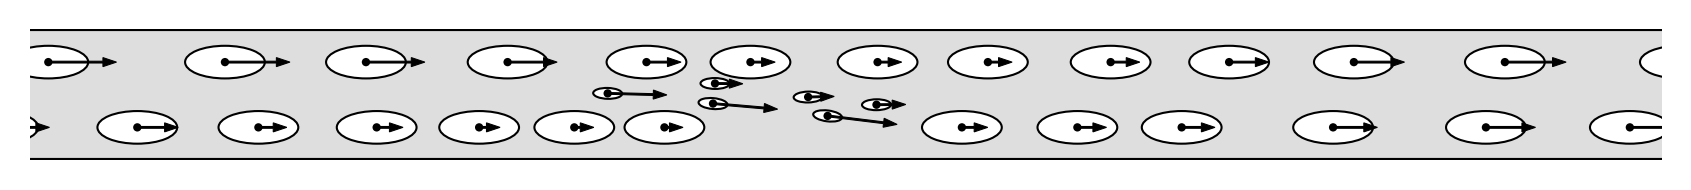

In [1820]:
# Create the animation
fig, ax = plt.subplots(figsize=(14.7 * params.cm, 2.5 * params.cm), dpi=300)
# start = 3600
start = t - 200
end = t + 200
ani_ring = animation.FuncAnimation(
    fig,
    animate_ring,
    frames=range(start, end),
    fargs=(
        item,
        ax,
        fig,
    ),
)
print(start)

In [1821]:
(end - start) * params.dt

8.0

In [1822]:
# Save the animation as an HTML video
ani_ring_html = ani_ring.to_jshtml()

In [1826]:
# HTML(ani_ring_html)

In [1825]:
path = "./output/movies/"
os.makedirs(path, exist_ok=True)
file = rf"{path}demo.gif"
writergif = animation.PillowWriter(fps=1 / params.dt)
ani_ring.save(file, writer=writergif)

In [ ]:
def navi(t, l_agents, idx, ax):
    a0 = l_agents[t][idx]["a0"]
    f_a = l_agents[t][idx]["f_a"]
    vel = l_agents[t - 1][idx]["vel"]
    theta = l_agents[t - 1][idx]["theta"]
    alphas = decay(array(vel), theta)
    ax.invert_xaxis()
    ax.set_yticks([])
    ax.set_ylim(0, params.d_max)
    ax.plot(degrees(alphas), f_a, "-ko", clip_on=False, lw=0.2, markersize=0.2)
    ax.axvline(np.degrees(a0), color="k", lw=0.2)
    ax.spines["left"].set_position("zero")
    ax.spines[["top", "right"]].set_visible(False)

In [97]:
def animate_navi(i, item, idx, ax, fig):
    fig.tight_layout(pad=0)
    ax.clear()
    navi(i, item[0], idx, ax)